What is the resale value of a used Toyota 4Runner?

# Imports

In [160]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PowerTransformer

In [164]:
data = pd.read_csv(filepath_or_buffer='data/cars.csv')
data.head()

,Brand,Model,Year,Status,Mileage,Dealer,Price
0,Mazda,CX-5,2023,New,NaN,NaN,36703.0
1,Kia,Sportage,2023,New,NaN,Classic Kia,28990.0
2,Chevrolet,Camaro,2024,New,NaN,Classic Chevrolet Beaumont,41425.0
3,Ford,Bronco,2023,Used,1551.0,Mike Smith Chrysler Dodge Jeep RAM,58900.0
4,Acura,TLX,2021,Used,30384.0,Mike Smith Nissan,34499.0


In [5]:
df = data

In [6]:
df.describe()

,Year,Mileage,Price
count,144867.000000,55914.000000,1.409560e+05
mean,2021.374716,52720.606485,5.267889e+04
std,3.995397,44014.784892,4.221504e+04
min,1959.000000,0.000000,1.000000e+00
25%,2021.000000,20116.000000,3.211000e+04
50%,2023.000000,41417.500000,4.707200e+04
75%,2024.000000,73590.750000,6.531125e+04
max,2024.000000,419096.000000,8.078160e+06


In [7]:
df.head()

,Brand,Model,Year,Status,Mileage,Dealer,Price
0,Mazda,CX-5,2023,New,NaN,NaN,36703.0
1,Kia,Sportage,2023,New,NaN,Classic Kia,28990.0
2,Chevrolet,Camaro,2024,New,NaN,Classic Chevrolet Beaumont,41425.0
3,Ford,Bronco,2023,Used,1551.0,Mike Smith Chrysler Dodge Jeep RAM,58900.0
4,Acura,TLX,2021,Used,30384.0,Mike Smith Nissan,34499.0


In [8]:
df[df['Status'] == 'Used'].isna().sum()

Brand       0
Model       0
Year        0
Status      0
Mileage     2
Dealer      0
Price      10
dtype: int64

In [9]:
# Replace NaN Mileage with 0 for New cars
df.loc[(df['Status'] == 'New') & (df['Mileage'].isna()), 'Mileage'] = 0
df

,Brand,Model,Year,Status,Mileage,Dealer,Price
0,Mazda,CX-5,2023,New,0.0,NaN,36703.0
1,Kia,Sportage,2023,New,0.0,Classic Kia,28990.0
2,Chevrolet,Camaro,2024,New,0.0,Classic Chevrolet Beaumont,41425.0
3,Ford,Bronco,2023,Used,1551.0,Mike Smith Chrysler Dodge Jeep RAM,58900.0
4,Acura,TLX,2021,Used,30384.0,Mike Smith Nissan,34499.0
...,...,...,...,...,...,...,...
144862,Chevrolet,Corvette,2023,New,0.0,Chase Chevrolet,122455.0
144863,Chevrolet,Corvette,2023,New,0.0,Chase Chevrolet,125930.0
144864,Jeep,Wrangler,2023,New,0.0,Stockton Dodge Chrysler Jeep RAM,53715.0
144865,Jeep,Wrangler,2023,New,0.0,Stockton Dodge Chrysler Jeep RAM,91450.0


In [10]:
avg_price = df.groupby(['Brand','Model', 'Status'])[['Price']].mean().reset_index()
avg_price

,Brand,Model,Status,Price
0,Acura,ILX,Certified,25269.500000
1,Acura,ILX,New,32845.000000
2,Acura,ILX,Used,21706.642857
3,Acura,Integra,Certified,32790.424242
4,Acura,Integra,New,40695.236686
...,...,...,...,...
1448,Volvo,XC60,Used,30347.660714
1449,Volvo,XC70,Used,13332.733333
1450,Volvo,XC90,Certified,44420.118644
1451,Volvo,XC90,New,69616.711765


In [11]:
df[df['Price'].isna() == True]

,Brand,Model,Year,Status,Mileage,Dealer,Price
15,Cadillac,XT5,2024,New,0.0,Navarre Chevrolet Cadillac,NaN
33,Ford,Maverick,2022,New,0.0,Planet Ford 59,NaN
34,Ford,Maverick,2022,New,0.0,Planet Ford 59,NaN
53,Cadillac,CT5,2024,New,0.0,Big Star Cadillac,NaN
276,Ford,F-250,2023,New,0.0,Shetler-Corley Motors,NaN
...,...,...,...,...,...,...,...
144737,Toyota,Highlander,2023,New,0.0,Atlantic Toyota,NaN
144740,Toyota,Camry,2023,New,0.0,Atlantic Toyota,NaN
144741,Toyota,Camry,2023,New,0.0,Atlantic Toyota,NaN
144814,Jeep,Compass,2023,New,0.0,Dolan Fernley Chrysler Jeep Dodge Ram,NaN


In [12]:
imputed_price = df[df['Price'].isna() == True].merge(right=avg_price, how='left', on=['Brand', 'Model', 'Status'])
imputed_price = imputed_price.drop(columns='Price_x')
imputed_price = imputed_price.rename(columns={'Price_y':'Price'})
imputed_price

,Brand,Model,Year,Status,Mileage,Dealer,Price
0,Cadillac,XT5,2024,New,0.0,Navarre Chevrolet Cadillac,56618.737288
1,Ford,Maverick,2022,New,0.0,Planet Ford 59,34174.893584
2,Ford,Maverick,2022,New,0.0,Planet Ford 59,34174.893584
3,Cadillac,CT5,2024,New,0.0,Big Star Cadillac,71350.641667
4,Ford,F-250,2023,New,0.0,Shetler-Corley Motors,74250.534156
...,...,...,...,...,...,...,...
3906,Toyota,Highlander,2023,New,0.0,Atlantic Toyota,50476.979185
3907,Toyota,Camry,2023,New,0.0,Atlantic Toyota,33677.467919
3908,Toyota,Camry,2023,New,0.0,Atlantic Toyota,33677.467919
3909,Jeep,Compass,2023,New,0.0,Dolan Fernley Chrysler Jeep Dodge Ram,34165.626984


In [13]:
df = pd.concat([df[df['Price'].isna() == False], imputed_price])
df

,Brand,Model,Year,Status,Mileage,Dealer,Price
0,Mazda,CX-5,2023,New,0.0,NaN,36703.000000
1,Kia,Sportage,2023,New,0.0,Classic Kia,28990.000000
2,Chevrolet,Camaro,2024,New,0.0,Classic Chevrolet Beaumont,41425.000000
3,Ford,Bronco,2023,Used,1551.0,Mike Smith Chrysler Dodge Jeep RAM,58900.000000
4,Acura,TLX,2021,Used,30384.0,Mike Smith Nissan,34499.000000
...,...,...,...,...,...,...,...
3906,Toyota,Highlander,2023,New,0.0,Atlantic Toyota,50476.979185
3907,Toyota,Camry,2023,New,0.0,Atlantic Toyota,33677.467919
3908,Toyota,Camry,2023,New,0.0,Atlantic Toyota,33677.467919
3909,Jeep,Compass,2023,New,0.0,Dolan Fernley Chrysler Jeep Dodge Ram,34165.626984


In [14]:
df = df.rename(columns={'Price':'Current Price'})

In [15]:
df.isna().sum()

Brand              0
Model              0
Year               0
Status             0
Mileage            2
Dealer           328
Current Price      0
dtype: int64

In [16]:
toyota = df[df['Brand'] == 'Toyota']

In [17]:
toyota_4runner = toyota[toyota['Model'] == '4Runner']

In [18]:
toyota_4runner

,Brand,Model,Year,Status,Mileage,Dealer,Current Price
36,Toyota,4Runner,2023,New,0.0,Tejas Toyota,49521.000000
37,Toyota,4Runner,2023,New,0.0,Tejas Toyota,50342.000000
461,Toyota,4Runner,2023,New,0.0,Morgan City Toyota,41524.000000
465,Toyota,4Runner,2023,New,0.0,Morgan City Toyota,51016.000000
469,Toyota,4Runner,2023,New,0.0,Morgan City Toyota,44584.000000
...,...,...,...,...,...,...,...
3519,Toyota,4Runner,2022,New,0.0,Elgin Toyota,49955.651188
3579,Toyota,4Runner,2022,New,0.0,Elgin Toyota,49955.651188
3688,Toyota,4Runner,2023,New,0.0,Treasure Coast Toyota of Stuart,49955.651188
3726,Toyota,4Runner,2023,New,0.0,Autoland Toyota/Chrysler/Jeep/Dodge,49955.651188


In [19]:
toyota_4runner.value_counts('Year')

Year
2023    979
2022    231
2021    204
2020    104
2024     90
2019     75
2018     67
2016     53
2017     36
2015     21
2014     20
2011     13
2012      7
2013      6
2007      4
2004      4
2005      3
2008      3
2010      2
2006      2
2002      1
2009      1
Name: count, dtype: int64

In [20]:
len(toyota_4runner[toyota_4runner['Status'] == 'New'])

983

In [90]:
used_toyota_4runner = toyota_4runner[toyota_4runner['Status'] == 'Used'].copy()
used_toyota_4runner['Price_Mile'] = used_toyota_4runner['Current Price'] / used_toyota_4runner['Mileage']
avg_price_mile = used_toyota_4runner['Price_Mile'].mean()
avg_price_mile = round(avg_price_mile, 2)

In [23]:
toyota_4runner['price_mile'] =  avg_price_mile


/var/folders/gg/ydyvqhls1lzggjy_z1wmnm0m0000gp/T/ipykernel_28084/3430110060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toyota_4runner['price_mile'] =  avg_price_mile


In [24]:
toyota_4runner.loc[toyota_4runner['Status'].isin(['Used', 'Certified']), 'Starting Price'] = (
    toyota_4runner['Current Price'] + 
    (toyota_4runner['price_mile'] * toyota_4runner['Mileage'])
)


/var/folders/gg/ydyvqhls1lzggjy_z1wmnm0m0000gp/T/ipykernel_28084/333301868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toyota_4runner.loc[toyota_4runner['Status'].isin(['Used', 'Certified']), 'Starting Price'] = (


In [25]:
toyota_4runner.loc[toyota_4runner['Status'] == 'New', 'Starting Price'] = toyota_4runner['Current Price']

In [26]:
toyota_4runner.loc[toyota_4runner['Status'] == 'Used']

,Brand,Model,Year,Status,Mileage,Dealer,Current Price,price_mile,Starting Price
761,Toyota,4Runner,2019,Used,124717.0,Northshore Toyota,28695.0,1.74,245702.58
801,Toyota,4Runner,2021,Used,14181.0,Cowboy Toyota,52318.0,1.74,76992.94
897,Toyota,4Runner,2020,Used,30642.0,Sewell Lexus of Dallas,45998.0,1.74,99315.08
898,Toyota,4Runner,2017,Used,23974.0,Sewell Lexus of Dallas,32998.0,1.74,74712.76
911,Toyota,4Runner,2011,Used,276070.0,Bluebonnet Chrysler Dodge RAM,11611.0,1.74,491972.80
...,...,...,...,...,...,...,...,...,...
143678,Toyota,4Runner,2020,Used,72526.0,Valley Cadillac,32998.0,1.74,159193.24
143850,Toyota,4Runner,2019,Used,47053.0,Bell Mitsubishi,35199.0,1.74,117071.22
143889,Toyota,4Runner,2018,Used,97931.0,Lynnes Nissan,28172.0,1.74,198571.94
144375,Toyota,4Runner,2012,Used,124584.0,Gale Toyota,19799.0,1.74,236575.16


<Axes: xlabel='Current Price', ylabel='Count'>

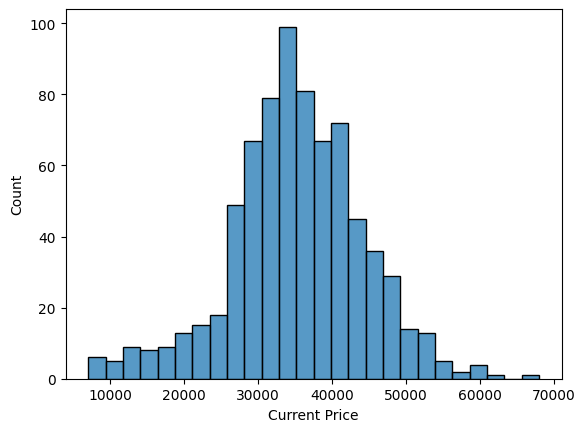

In [91]:
sns.histplot(data=used_toyota_4runner, x='Current Price')

<Axes: xlabel='Mileage', ylabel='Count'>

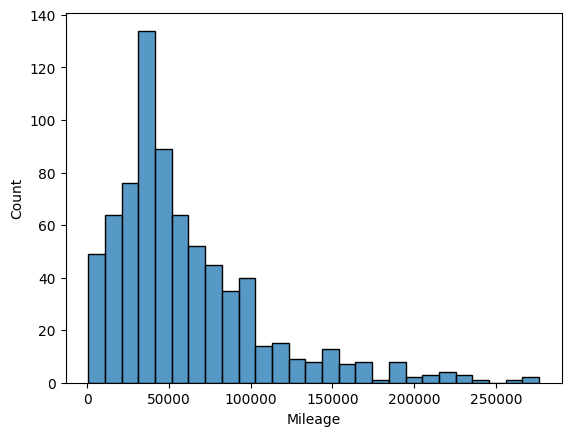

In [93]:
sns.histplot(data=used_toyota_4runner, x='Mileage')

<Axes: xlabel='Vehicle Age', ylabel='Count'>

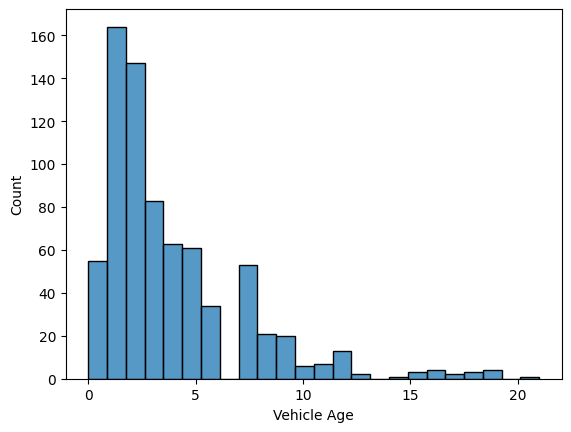

In [263]:
sns.histplot(data=used_toyota_4runner, x='Vehicle Age')

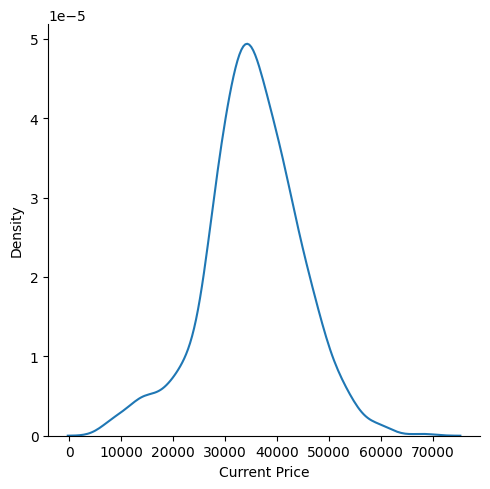

In [94]:
sns.displot(data=used_toyota_4runner, x='Current Price', kind='kde')

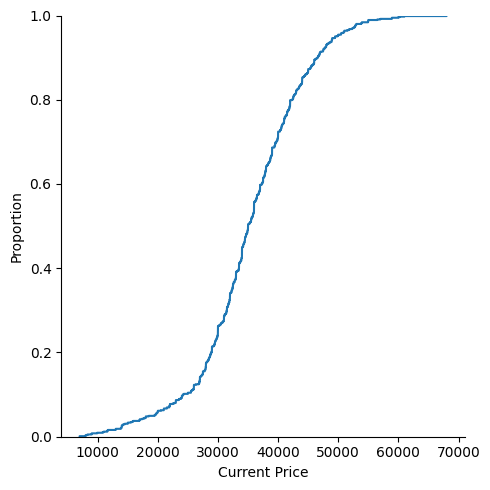

In [95]:
sns.displot(data=used_toyota_4runner, x='Current Price', kind='ecdf')

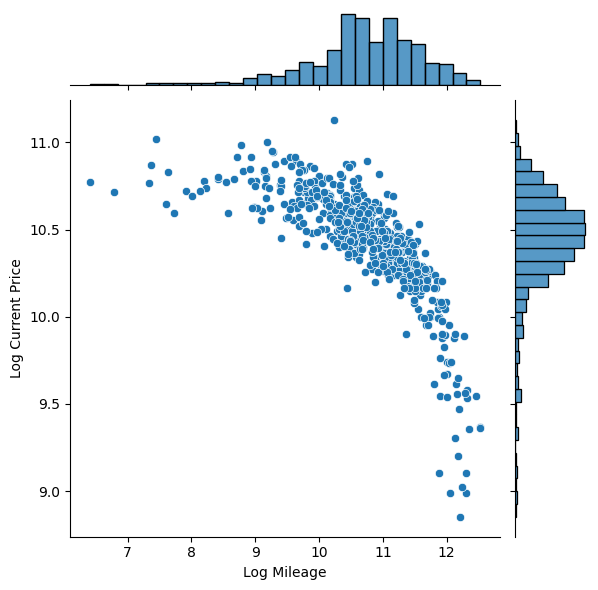

In [262]:
sns.jointplot(data=pd.concat([X_train, y_train], axis=1), x="Log Mileage", y="Log Current Price")

# Modeling

In [130]:
# box-cox transformation for normality
bc = PowerTransformer(method="box-cox")

In [128]:
# perform power transforms and quantile transform
used_toyota_4runner['BC Mileage'] = bc.fit(used_toyota_4runner[['Mileage']]).transform(used_toyota_4runner[['Mileage']])

In [124]:
used_toyota_4runner.loc[:, 'Log Current Price'] = np.log(used_toyota_4runner['Current Price'])

In [125]:
used_toyota_4runner.loc[:, 'Log Mileage'] = np.log(used_toyota_4runner['Mileage'])

In [126]:
current_yr = 2023
used_toyota_4runner.loc[:,'Vehicle Age'] = current_yr - used_toyota_4runner.loc[:, 'Year']

In [261]:
predictors = ['Vehicle Age', 'Log Mileage']
target = ['Log Current Price']

X_train, X_val, y_train, y_val = train_test_split(
    used_toyota_4runner[predictors],
    used_toyota_4runner[target],
    test_size=0.20,
    random_state=42
)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
y_pred = pd.DataFrame(data=y_pred, index=X_train.index, columns=['Predicted'])
print(f"Mean squared error: {mean_squared_error(y_train, y_pred):.2f}")
print(f"Coefficient of determination: {r2_score(y_train, y_pred):.2f}")
print('\n')

preds = model.predict(X_val)
print(f"Mean squared error: {mean_squared_error(y_val, preds):.2f}")
print(f"Coefficient of determination: {r2_score(y_val, preds):.2f}")

Mean squared error: 0.02
Coefficient of determination: 0.77


Mean squared error: 0.02
Coefficient of determination: 0.77


In [251]:
residuals = pd.concat([X_train, y_train, y_pred], axis=1)
residuals['Residuals'] = residuals['Predicted'] - residuals['Current Price']
residuals

,Vehicle Age,BC Mileage,Current Price,Predicted,Residuals
11505,6,0.921910,31989.0,28302.805177,-3686.194823
26516,1,-0.007860,39500.0,37535.220702,-1964.779298
121712,1,-0.116149,38384.0,38140.496267,-243.503733
40073,6,0.100568,40550.0,32893.646492,-7656.353508
37436,5,0.916806,31998.0,29138.440170,-2859.559830
...,...,...,...,...,...
12582,5,0.498500,31990.0,31476.533067,-513.466933
18026,8,0.613902,30578.0,28410.186435,-2167.813565
40638,2,-0.376330,40295.0,38787.658265,-1507.341735
72321,9,1.652611,23998.0,21797.284591,-2200.715409


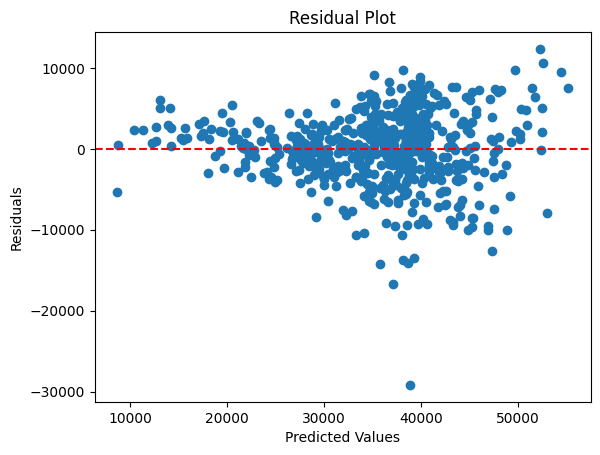

In [252]:
plt.scatter(residuals['Predicted'], residuals['Residuals'])
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

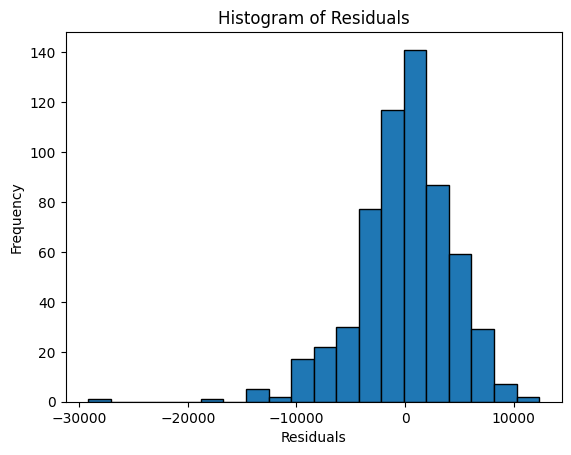

In [253]:
plt.hist(residuals['Residuals'], bins=20, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

In [254]:
greatest_residual = residuals.sort_values(by='Residuals', ascending=True)[:1]
greatest_residual_index = greatest_residual.index[0]
residuals.loc[[greatest_residual_index]]

,Vehicle Age,BC Mileage,Current Price,Predicted,Residuals
17010,4,-0.676957,68017.0,38853.783456,-29163.216544


In [266]:
residuals['Abs Residuals'] = abs(residuals['Residuals'])
residuals['Abs Residuals'].mean()

np.float64(3267.916968258312)

In [ ]:
# define bin edges for Vehicle Age
bins = [-1, 2, 4, 6, 8, 10, 15, 20, 100000]
labels = ['0-2', '2-4', '4-6', '6-8', '8-10', '10-15', '15-20', '20+']

residuals['Binned Vehicle Age'] = pd.cut(residuals['Vehicle Age'], bins=bins, labels=labels)

residuals.groupby(by='Binned Vehicle Age', observed=True).agg({'Abs Residuals':['mean', 'count']})

Abs Residuals      
                            mean count
Binned Vehicle Age                    
0-2                  4068.935654   294
2-4                  3101.331893   113
4-6                  2316.565101    77
6-8                  1812.393825    62
8-10                 2072.406486    18
10-15                1723.414026    21
15-20                3594.248776    11
20+                   453.166132     1

In [288]:
294 + 113 + 77 + 62 + 18 + 21 + 11 + 1

597

In [289]:
len(residuals)

597

In [284]:
residuals.isna().sum()

Vehicle Age            0
BC Mileage             0
Current Price          0
Predicted              0
Residuals              0
Abs Residuals          0
Binned Vehicle Age    44
dtype: int64

In [295]:
residuals[residuals['Vehicle Age'] == 5]

,Vehicle Age,BC Mileage,Current Price,Predicted,Residuals,Abs Residuals,Binned Vehicle Age
37436,5,0.916806,31998.0,29138.440170,-2859.559830,2859.559830,4-6
22167,5,1.211146,31692.0,27493.242709,-4198.757291,4198.757291,4-6
23454,5,-0.591490,32990.0,37568.968745,4578.968745,4578.968745,4-6
62366,5,0.816238,29814.0,29700.556833,-113.443167,113.443167,4-6
22575,5,0.653041,32273.0,30612.735189,-1660.264811,1660.264811,4-6
84916,5,1.155235,29500.0,27805.753789,-1694.246211,1694.246211,4-6
70068,5,0.952153,30888.0,28940.868052,-1947.131948,1947.131948,4-6
121026,5,1.200484,27826.0,27552.839694,-273.160306,273.160306,4-6
65789,5,-0.070400,41111.0,34656.366357,-6454.633643,6454.633643,4-6
26730,5,0.130301,32888.0,33534.557760,646.557760,646.557760,4-6
